In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
df_original = pd.read_csv(
    "./data/abalone_train.csv",
    names=[
        "length",
        "diameter",
        "height",
        "whole_weight",
        "shucked_weight",
        "viscera_weight",
        "shell_weight",
        "age",
    ],
)

df = df_original.copy()

df.sample(n=10)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
2979,0.455,0.435,0.110,0.4265,0.1950,0.0900,0.1205,8
1269,0.505,0.390,0.125,0.5445,0.2460,0.1500,0.1405,7
1143,0.730,0.560,0.190,1.9425,0.7990,0.5195,0.5655,11
2385,0.555,0.405,0.190,1.4060,0.6115,0.3420,0.3890,10
1141,0.575,0.440,0.150,0.9830,0.4860,0.2150,0.2390,8
2373,0.275,0.195,0.070,0.0875,0.0345,0.0220,0.0255,4
1570,0.590,0.470,0.135,1.1685,0.5390,0.2790,0.2800,8
1629,0.655,0.515,0.200,1.4940,0.7255,0.3090,0.4050,12
2053,0.720,0.550,0.205,2.1650,1.1055,0.5250,0.4040,10
968,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          3320 non-null   float64
 1   diameter        3320 non-null   float64
 2   height          3320 non-null   float64
 3   whole_weight    3320 non-null   float64
 4   shucked_weight  3320 non-null   float64
 5   viscera_weight  3320 non-null   float64
 6   shell_weight    3320 non-null   float64
 7   age             3320 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 207.6 KB


In [4]:
df.describe().round(3)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,3320.000,3320.000,3320.000,3320.000,3320.000,3320.000,3320.000,3320.000
mean,0.523,0.407,0.139,0.825,0.358,0.180,0.238,9.897
std,0.121,0.100,0.043,0.491,0.222,0.110,0.140,3.206
min,0.075,0.055,0.000,0.002,0.001,0.000,0.002,1.000
25%,0.450,0.345,0.115,0.436,0.182,0.092,0.127,8.000
50%,0.540,0.425,0.140,0.795,0.336,0.171,0.230,9.000
75%,0.615,0.480,0.165,1.150,0.504,0.253,0.325,11.000
max,0.815,0.650,1.130,2.826,1.488,0.760,1.005,27.000


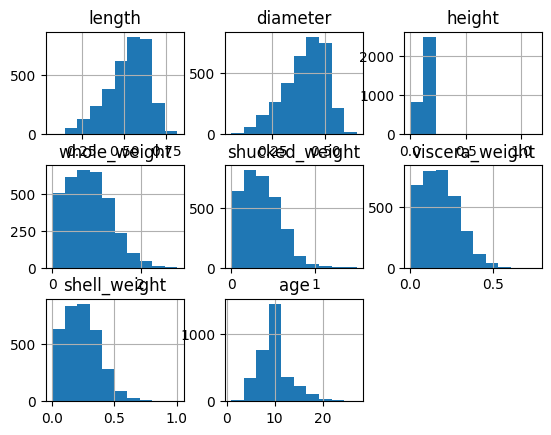

In [5]:
df.hist()
plt.show()

In [6]:
for label, content in df.items():
    print(f'Unique values in "{label}": {len(content.unique())}')

Unique values in "length": 132
Unique values in "diameter": 110
Unique values in "height": 51
Unique values in "whole_weight": 2145
Unique values in "shucked_weight": 1409
Unique values in "viscera_weight": 845
Unique values in "shell_weight": 855
Unique values in "age": 26


In [7]:
X = np.array(df.drop("age", axis=1))
y = np.array(df["age"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
print("--------------------------------------------------")
print(f"Input Shape: {X_train.shape}")
print("--------------------------------------------------")

--------------------------------------------------
Input Shape: (2490, 7)
--------------------------------------------------


In [10]:
normalization_layer = tf.keras.layers.Normalization()

normalization_layer.adapt(X_train)

In [11]:
model = tf.keras.Sequential(
    [
        normalization_layer,
        tf.keras.layers.Input(7),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1),
    ]
)

In [12]:
loss_function = tf.keras.losses.MeanSquaredError()

In [13]:
optimizer_function = tf.keras.optimizers.Adam()

In [14]:
model.compile(loss=loss_function, optimizer=optimizer_function)

In [15]:
model.fit(X_train, y_train, epochs=7)

Epoch 1/7
78/78 [==============================] - 1s 1ms/step - loss: 98.9086
Epoch 2/7
78/78 [==============================] - 0s 1ms/step - loss: 73.0699
Epoch 3/7
78/78 [==============================] - 0s 1ms/step - loss: 39.3215
Epoch 4/7
78/78 [==============================] - 0s 1ms/step - loss: 14.5478
Epoch 5/7
78/78 [==============================] - 0s 1ms/step - loss: 6.3513
Epoch 6/7
78/78 [==============================] - 0s 1ms/step - loss: 5.2289
Epoch 7/7
78/78 [==============================] - 0s 1ms/step - loss: 5.1384


In [16]:
model.predict(X_test)

26/26 [==============================] - 0s 802us/step


array([[11.116828 ],
       [ 8.564237 ],
       [ 6.9300957],
       [10.467041 ],
       [ 5.990055 ],
       [ 8.575321 ],
       [ 6.1967487],
       [12.6641445],
       [13.079613 ],
       [13.0506935],
       [ 7.5163937],
       [11.035359 ],
       [ 7.034242 ],
       [ 9.886737 ],
       [10.980423 ],
       [ 9.927604 ],
       [11.3693   ],
       [ 7.9374304],
       [ 9.394624 ],
       [11.161167 ],
       [ 7.5616875],
       [10.048052 ],
       [ 9.6921425],
       [ 5.7215514],
       [12.137227 ],
       [ 9.468941 ],
       [10.971427 ],
       [ 2.4505656],
       [11.218954 ],
       [ 7.6490245],
       [11.1161585],
       [10.475949 ],
       [14.54437  ],
       [ 8.038017 ],
       [13.344707 ],
       [ 9.095662 ],
       [10.371385 ],
       [10.594015 ],
       [ 8.299686 ],
       [10.356532 ],
       [ 9.449792 ],
       [ 8.699337 ],
       [ 7.6123824],
       [ 7.4921217],
       [ 7.1689262],
       [ 9.955049 ],
       [ 5.6664505],
       [ 9.21

In [17]:
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 915us/step - loss: 4.5831


4.583137035369873